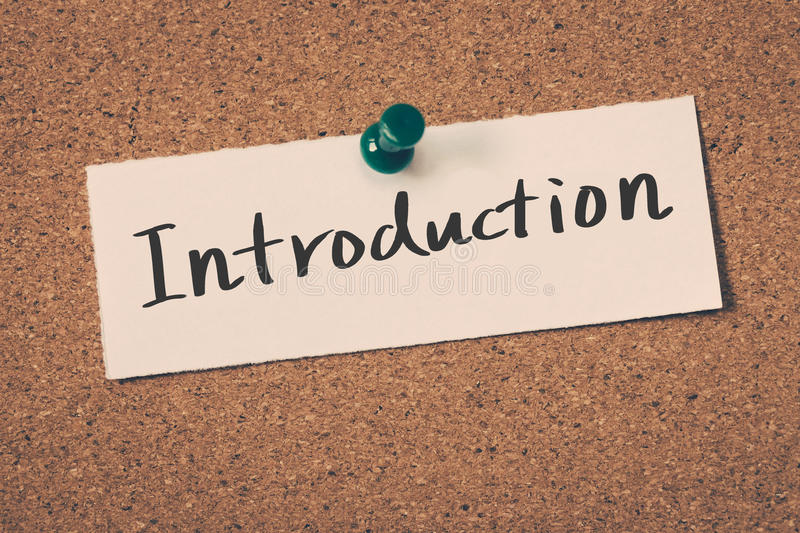

# Introduction
 The natural process through which employees quit the workforce is known as employee attrition.

In order to examine the elements that contribute to employee attrition, I will be examining a dataset developed by IBM data scientists in this notebook. About 1, 470 current and past employees are included in the data, along with details about their monthly wage, job satisfaction, work-life balance, experience, and other factors. Exploratory data analysis will be performed depending on a few questions.

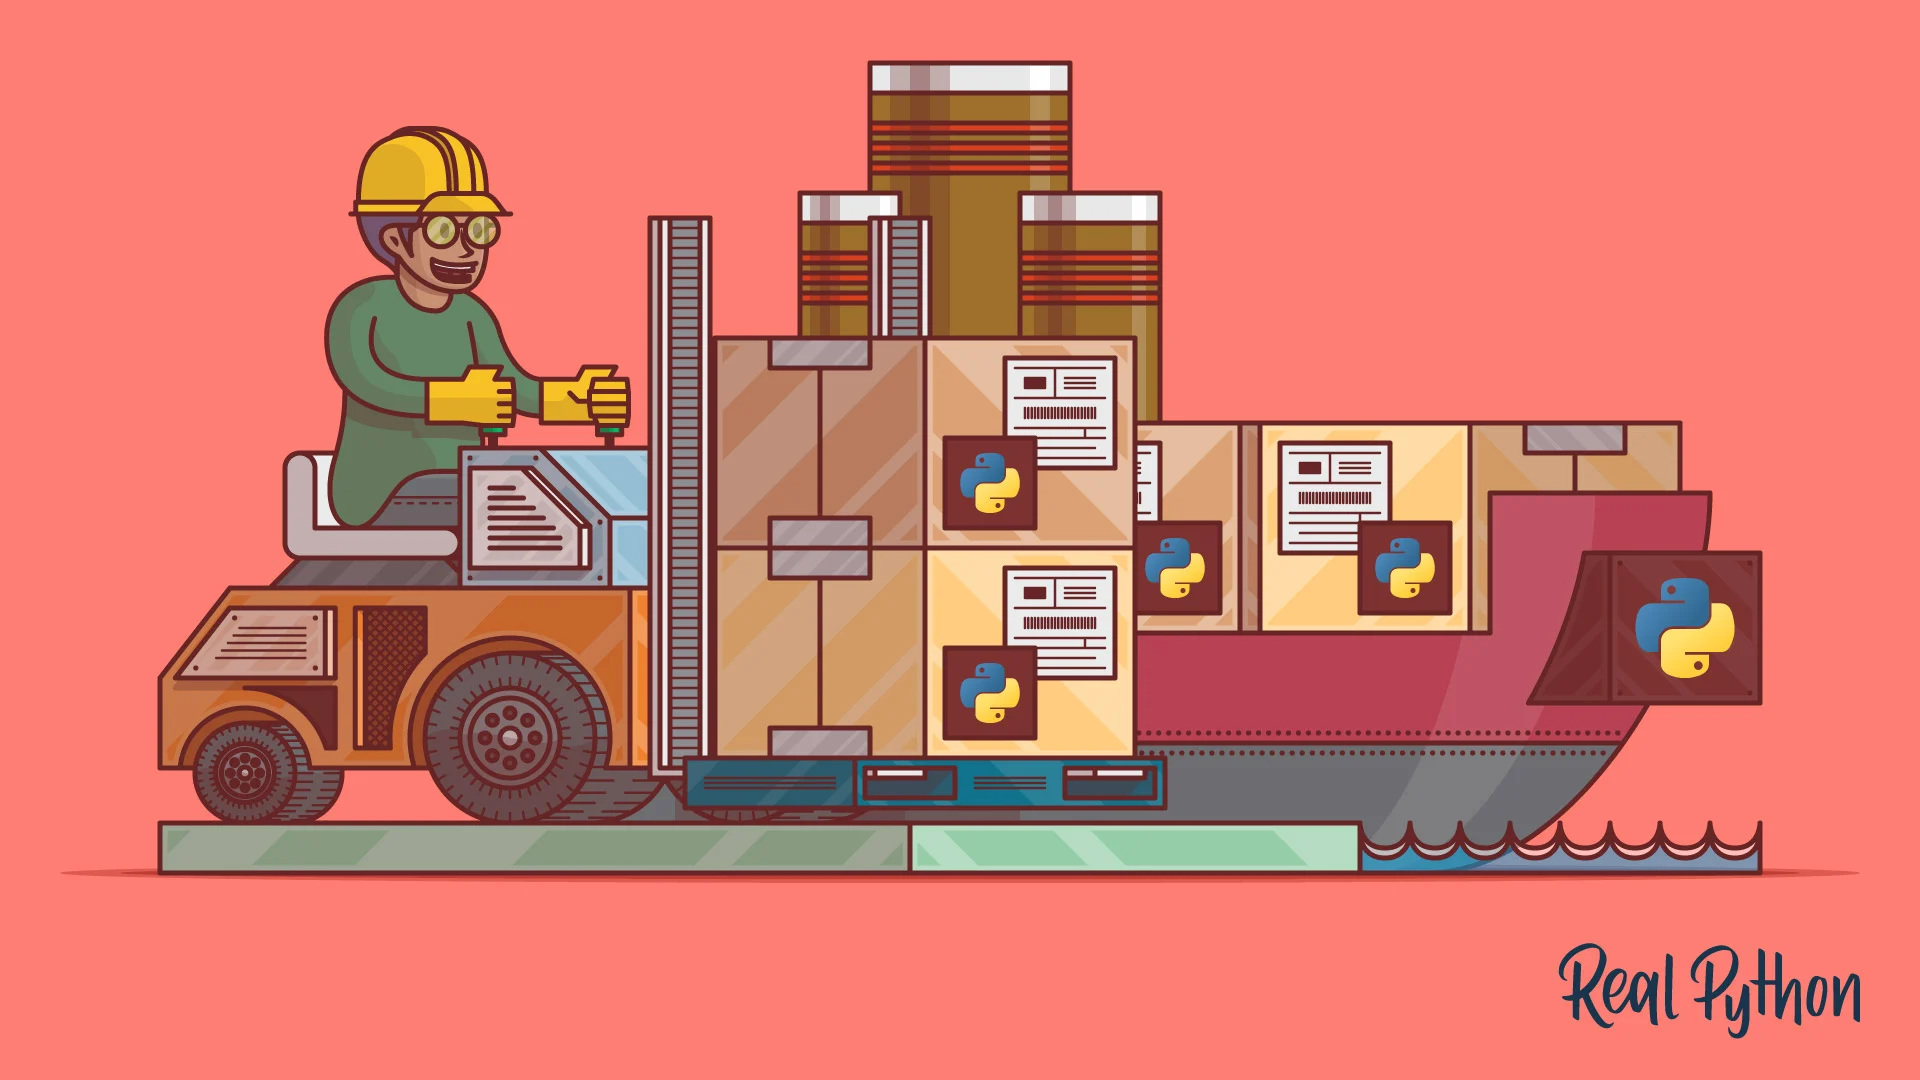

### Importing Libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlalchemy as sql
import psycopg2 as pg2
import sqlite3
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


### Connect to Database

In [ ]:
con = sqlite3.connect("attr_data.db")

##### **Add cursor to the connection to run queries**

In [ ]:
cur = con.cursor() 

##### **Convert the table to a dataframe and display the head of the table**

In [ ]:
df = pd.read_sql_query("SELECT * FROM 'attrition_records';", con) 

##### **Viewing the head(first 5 rows of the table)**

In [ ]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


##### **Taking a peep at the table. Its shape, description, columns dtypes etc**

In [ ]:
Attrition = df.query("Attrition == 'Yes'")
Attrition.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
14,15,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
21,22,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,...,2,80,0,10,4,3,5,3,0,3
24,25,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,...,3,80,0,8,2,3,4,2,1,3


In [ ]:
Attrition.shape

(237, 36)

In [ ]:
print(f"{Attrition.shape[0]} emplyees in the dataset left the company.\n")

237 emplyees in the dataset left the company.



In [ ]:
# This outputs the shape of the data, number of rows and columns
df.shape   

(1470, 36)

In [ ]:
# Taking a look at the statistics of the numeric columns of the data
df.describe() 

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Display the columns in the table, along side their data types
df.dtypes 

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

##### **Checking for null values in the table**

In [ ]:
# Check for null values in the data set
df.isnull().sum() 

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

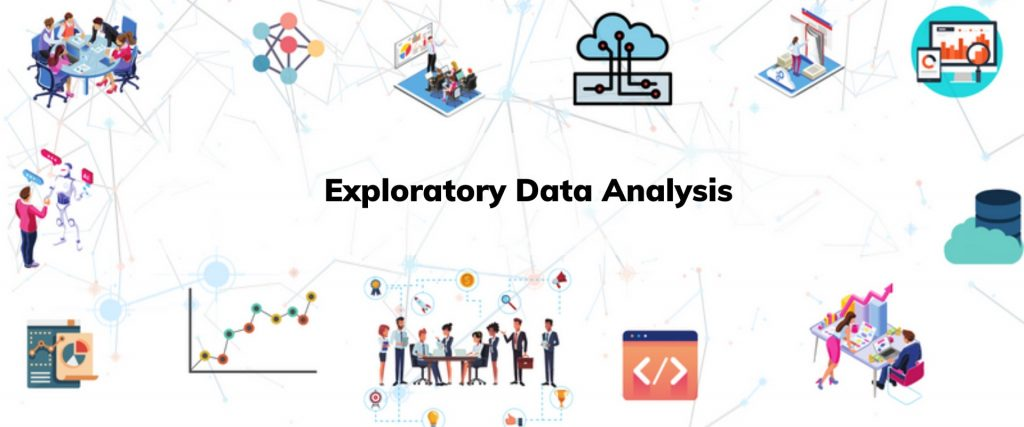

##### **Exploratory Data Analysis**

In [ ]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [ ]:
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
# This displays the numeric columns, their counts, unique values, their frequencies
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
attr_groupby = df.groupby('Attrition').sum() # Grouping by "Attrition" 
attr_groupby

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,909250,46313,1001818,10993,3609,1233,1267100,3417,81319,3416,...,3371,98640,1042,14627,3493,3429,9086,5529,2755,5385
Yes,171935,7965,177836,2520,673,237,239452,584,15541,597,...,616,18960,125,1954,622,630,1216,688,461,676


In [ ]:
attr_value = attr_groupby.EmployeeCount.sort_values().index #  Sort the indices 
attr = attr_groupby.EmployeeCount.sort_values()

print(attr_value)

print(attr)



Index(['Yes', 'No'], dtype='object', name='Attrition')
Attrition
Yes     237
No     1233
Name: EmployeeCount, dtype: int64


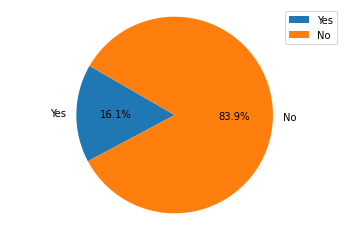

In [ ]:
# Ploting the pie chart of the IBM employee Attrition column
plt.pie(attr, labels = attr_value, autopct='%2.1f%%',  startangle=150) 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

In [ ]:
print(df['Education'].corr(df['MonthlyIncome']))

0.09496067704188886


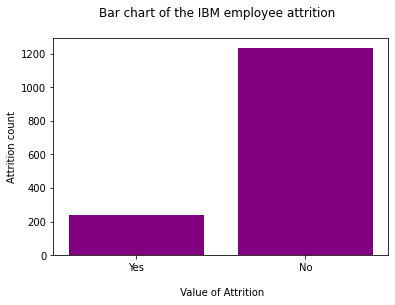

In [ ]:
# Ploting the bar graph of the IBM employee Attrition column
plt.bar(attr_value, attr, color= 'Purple')

# Set x and y axis titles
plt.ylabel('Attrition count')
plt.xlabel('\n Value of Attrition') # Note: '\n' creates a newline

# Set graph title
plt.title('Bar chart of the IBM employee attrition  \n')

# Show graph
plt.show()

In [ ]:
# Group bar graph of Attrition rate by Department and Gender

plot_df = df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': 'green','No': 'blue'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='silver', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.show()

In [ ]:
#  Bar graph of fomer and current employee attrition rate 
# Pie chart of IBM employee attrition rate by department
fig=make_subplots(rows=1, cols=2, 
                  subplot_titles=("", "Employee Attrition by Department"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=df['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='brown'), marker_color=['blue','silver'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='purple')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=df[df.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['red','yellow','indigo']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')      
fig.show()

In [ ]:
#  Bar graph of IBM employee attrition rate by Work Life balance and gender

plot_df = df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
fig.show()

In [ ]:
# IBM employee attrition rate by Job satisfaction

plot_df = df.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='Job Satisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [ ]:
# Average salaries by department and gender
 
plot_df = df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [ ]:
# Median salaries by Department and attrition status
 
plot_df = df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()


In [ ]:
# Bar graph of average salaries by job roles
 
plot_df = df.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [ ]:
# Histogram distribution of monthly income by attrition status

plot_df=df.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [ ]:
# Boxplot of the distribution of monthly income by work life balance
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(df['Gender'].unique()):
    df_plot=df[df['Gender']==j]
    fig.add_trace(go.Box(x=df_plot['WorkLifeBalance'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Work Life Balance',
                  xaxis_title='Work Life Balance', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Fair', 'Good', 'Excellent']),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [ ]:
# Scatter plot showing monthly income increase with total number of years worked and job level
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [ ]:
# Correlation matrix of IBM employee attrition
cat_cols=[]
for i in df.columns:
    if df[i].nunique() <= 5 or df[i].dtype == object:
        cat_cols.append(i)
df2=df.copy()
df2.drop(df[cat_cols], axis=1, inplace=True)
corr=df2.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition", 
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

In [ ]:
print(df['Education'].corr(df['MonthlyIncome']))

0.09496067704188886


In [ ]:
df.pivot_table('MonthlyIncome',index="Education",columns="Gender")

Gender,Female,Male
Education,,
1,5781.433333,5563.736364
2,6169.068376,6267.472727
3,6810.685106,6312.652819
4,6878.064935,6803.581967
5,9240.954545,7462.538462


In [ ]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,id,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,41
1,2,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,49
2,3,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,37
3,4,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,33
4,5,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,36
1466,1467,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,39
1467,1468,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,27
1468,1469,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,49


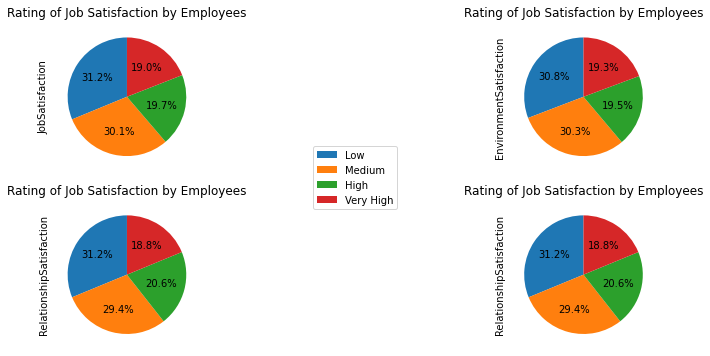

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

labels = 'Low', 'Medium', 'High', 'Very High'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        startangle=90,
                        labels=None,ax=ax1) #add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels, loc='center') 

labels = 'Low', 'Medium', 'High', 'Very High'

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        startangle=90,
                        labels=None,ax=ax2) #add to subplot 2
ax2.set_title ('Rating of Job Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        startangle=90,
                        labels=None,ax=ax3) #add to subplot 2
ax3.set_title ('Rating of Job Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        startangle=90,
                        labels=None,ax=ax4) #add to subplot 2
ax4.set_title ('Rating of Job Satisfaction by Employees')


plt.show()

Now I want prepare the data for the model. We will first transform non-numeric columns to numerical columns.

##### *Intuition*

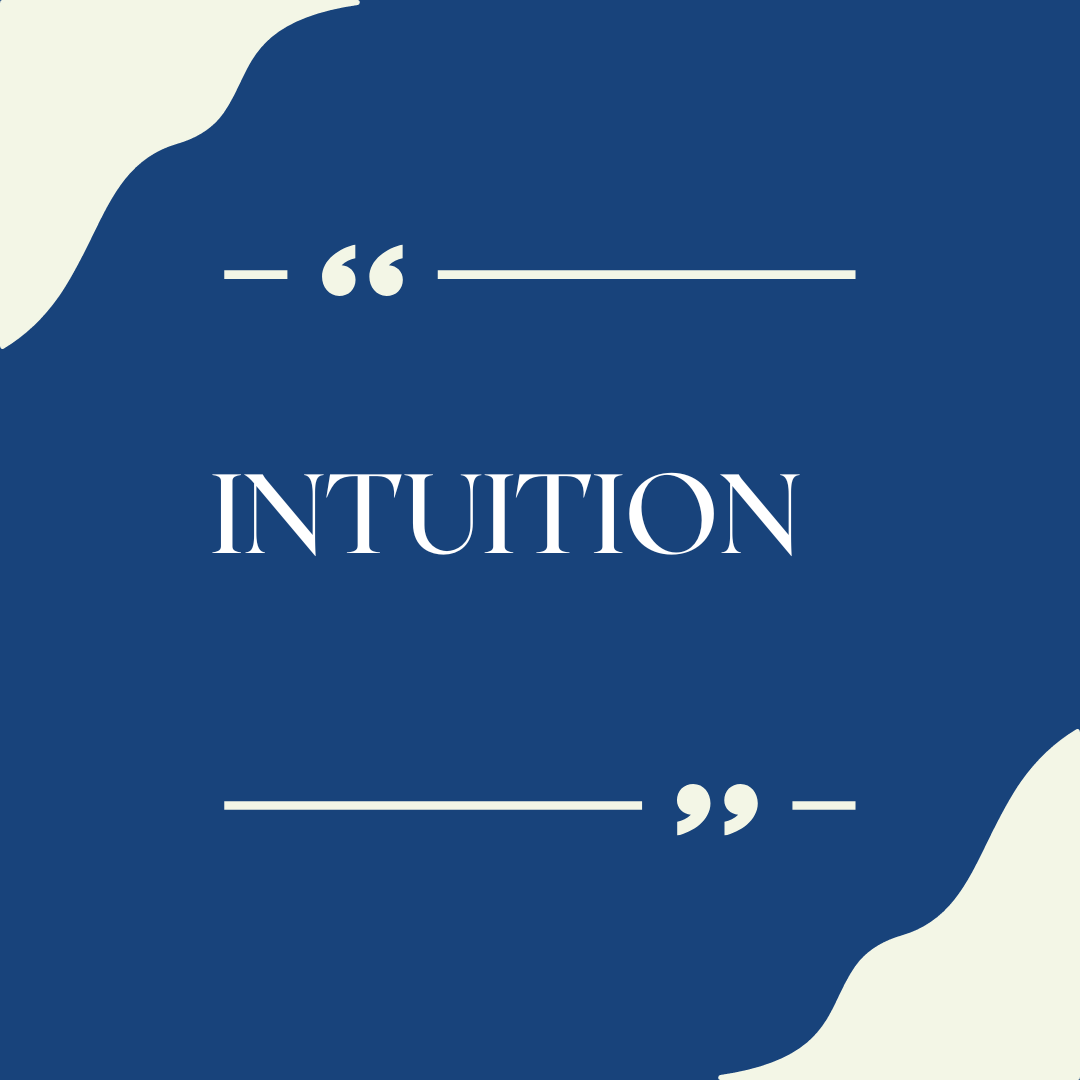

##### The three factors behind Employee Attrition 

##### 1 Age 

Going by the attrition per age histogram, It show that as employees grow old, the less they tend to leave, and most of the employees attrition is made of employees ranging from 25 to 35 years old. The data also shows that the more working years, at the company, and more years in current role employees accumulate, the less likely they are to leave.

##### 2.Monthly Income

Based on my assessments of monthly income, I discovered that the majority of departing employees belonged to the group of people who earned between $2,000 and $3,000 per month. In addition, those with lower percentage compensation increases tend to resign more frequently than those with larger percentage income increases.

##### **3. EnvironmentSatisfaction**


It is also interesting to note that the majority of departing employees expressed poor levels of satisfaction with their working conditions. Given that the majority of them had worked with their previous bosses for less than two years, this might be the result of unsatisfactory relationships with them. According to the EnvironmentSatisfaction ratings curve, meanwhile, when employees first join a firm, they stay in the hopes that everything goes well; but, as their stay lengthens, more of them leave in search of greener pastures, leaving only a few behind.

##### The relationship between monthly income and education


There is a weakly positive link between education and monthly income, as indicated by the correlation coefficient of 0.09496067704188886. This implies that further education has little to no impact on monthly income.

##### The effect of age on attrition

As was already established, employees have a tendency to stay with the organization as they get older. This implies that a person's age plays a significant role in determining whether or not they continue with a company.



##### Is Income the main factor in employee attrition?

Both for existing employees and departing personnel, the histogram of monthly income distribution is positively biased and lower generally for departing staff. The median monthly income of former employees was over $2,000 less than that of current employees.

##### How does work-life balance impact the overall attrition rate?
People who have poor work-life balance have adapted to their occupations, but those who have a better work-life balance score are more acclimated to the better life and are more likely to seek attrition. However, this trend disappears when people are happy with their jobs and there is a great work-life balance.

##### References 


https://www.google.com/search?q=video+of+a+complete+data+science+project+for+beginners+in+python+on+employee+attrition+analysis&sxsrf=ALiCzsZXbAjpsOgP6x73h2g1Rt99cpItQA%3A1672098745706&ei=uTOqY4_aKuGhlQf92K_4DQ&ved=0ahUKEwjPmpGevZj8AhXhUOUKHX3sC98Q4dUDCA8&uact=5&oq=video+of+a+complete+data+science+project+for+beginners+in+python+on+employee+attrition+analysis&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzoKCAAQRxDWBBCwAzoECCEQCkoECEEYAEoECEYYAFDQLFjAUmCKV2gCcAF4AIABqQKIAasTkgEEMi0xMJgBAKABAcgBCMABAQ&sclient=gws-wiz-serp#fpstate=ive&vld=cid:56b73c5f,vid:iKeAdc7sRtY


https://www.kaggle.com/code/salehahmedrony/hr-analytics-employee-attrition-eda-prediction/notebook


https://medium.com/analytics-vidhya/predict-employee-attrition-a34e2c5a972d